## **Capstone Project 2: Customer Relationship Management Analysis of Gamma**

**JCDS 0406 011 - Muhamad Shidqi**

# Background Statement

Gamma is software as a service (SaaS) company based at United State of America who selling software for other companies (B2B) and delivered it to customer via Amazon Web Service (AWS) platform. Gamma offer software as innovative solution that fit for some industries.

After four years of operation Gamma have a good financial performance, this indicate from profit that Gamma make from 2020 to 2023. Based on that condition, Board of Gamma think this is the right time to have Gamma Customer Relation Management Program who called GCRM.

Purpose of GCRM are intended to improve customer-company connections by effectively understanding, managing, and utilizing customer interactions. Gamma want to increase customer satisfaction by providing specialized services, increase loyalty by responding of particular desires, increase revenue by finding opportunities or streamline operations, and provide a deeper understanding of clients through data analysis. GCRM in the final phases want develops better and more lasting relationships between Gamma and their customers by prioritizing customer demands and experiences.

Board decide first phase of GCRM implementation are have branchs office in several countries outside USA as representative council of Gamma. The branch will consist of Account Manager who will be assigned to assist Gamma Customers.

The account manager will be responsible for building and maintaining relationships with customers. Their tasks include identifying customer needs, delivering right product as a solution to customer issues, contract negotiation, and ensuring customer satisfaction and retention. They may also collaborate with various internal teams to ensure timely and quality service to customers.

## Problem Statement
As first phase implementation of GCRM, company want to know **most effective segment for company**, **which location that suit for the branch** , and **what the most needed product at that location**. This information will help Gamma to form account manager team and choose location for the branch.

From the explanation above, we conclude some questions:

1. What's the segment that should be proritize to have an Account Manager?

2. Where is the right locations for the **Gamma Branch Office**?

3. What is the most needed product at the branch location?

As a **data analyst**, we will try to answer the question above.



## Objective
Our objective are:

1. Examine the most effective segment for **Gamma**.

2. Examine ideal locations for **Gamma Branch Office**.

2. Examine the most required products in the each recommended location.

# Data
To achive our objective, let's analyze Gamma Sales Dataset that provide by company. The dataset can be access here : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
source = pd.read_csv('Gamma-Sales.csv')
source

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Data Understanding and Cleaning
Before we go to analysis, we should known our dataset condition to have better data understanding. From this stage, we will know anomalies that exist inside our dataset and we need take care that anomalies in data wrangling and cleaning process. All things that we have done with these anomalies will be have explanations from domain knowledge or statistic wise. 

First, we let's see general information about this dataset.

| **No** | **Column Name** |                                   **Description**                                  | **Data Type** |
|:------:|:---------------:|:----------------------------------------------------------------------------------:|:-------------:|
|      1 | Row ID          | A unique identifier for each transaction.                                          |     Object    |
|      2 | Order ID        | A unique identifier for each order.                                                |     Object    |
|      3 | Order Date      | The date when order was placed                                                     |   Date Time   |
|      4 | Year            | A numerical representation of the order date. (Year)                               |    Integer    |
|      5 | Contact Name    | The name of person who placed the order.                                           |     Object    |
|      6 | Country         | The country where the order was placed.                                            |     Object    |
|      7 | City            | The city where the order was placed.                                               |     Object    |
|      8 | Region          | The region where the order was placed.                                             |     Object    |
|      9 | Subregion       | The subregion where the order was placed.                                          |     Object    |
|     10 | Customer        | The name of company that placed the order.                                         |     Object    |
|     11 | Customer ID     | A unique identifier for each customer.                                             |     Object    |
|     12 | Industry        | The industry the customer belongs to.                                              |     Object    |
|     13 | Segment         | The customer segment (SMB, Strategic, and Enterprise)                              |     Object    |
|     14 | Product         | The product was ordered.                                                           |     Object    |
|     15 | License         | The license key for every product. Unique for every product from every transaction |     Object    |
|     16 | Sales           | The total sales amount for the transaction in hundred USD.                         |     Float     |
|     17 | Quantity        | The total number of items in the transaction. Minimum value is 1.                  |    Integer    |
|     18 | Discount        | The discount applied to the transaction between range 0.0 to 1.0                   |     Float     |
|     19 | Profit          | The profit from transaction in hundred USD.                                        |     Float     |

In [3]:
print(f'Total data and columns in Saas Sales dataset is {source.shape[0]} rows and {source.shape[1]} columns.')
source.info()

Total data and columns in Saas Sales dataset is 9994 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 1

In [4]:
display(source.describe(), source.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### Data Type
From information above we known some columns have inappropriate data type, these columns need to change their data type:

Order Date should be a ***datetime*** not ***object***;

Date Key should become **Year**;
    
Customer ID should be a ***object*** not ***integer***; and

Row ID should become **index**.

In [5]:
#Change Customer ID
source['Customer ID'] = source['Customer ID'].astype(object)

#Change Order Date
source['Order Date'] = source['Order Date'].astype('datetime64[ns]')

#Change Value of Date Key become Year
source['Date Key'] = source['Order Date'].dt.year.astype('object')
#Rename Date Key become Year
source = source.rename(columns={'Date Key':'Year'})

#Multiply Sales and Profit with 100
source['Sales'] = source['Sales']*100
source['Profit'] = source['Profit']*100

#Delete Row ID Column
source.drop('Row ID', axis=1, inplace=True)

#Sort by Order ID
source.sort_values(by='Order ID', inplace=True)
source.reset_index(inplace=True)
#Delete Index Column
source.drop('index', axis=1, inplace=True)

display(source.describe(), source.describe(include='object'), source)

,Sales,Quantity,Discount,Profit
count,9.994000e+03,9994.000000,9994.000000,9994.000000
mean,2.298580e+04,3.789574,0.156203,2865.689631
std,6.232451e+04,2.225110,0.206452,23426.010769
min,4.440000e+01,1.000000,0.000000,-659997.800000
25%,1.728000e+03,2.000000,0.000000,172.875000
50%,5.449000e+03,3.000000,0.200000,866.650000
75%,2.099400e+04,5.000000,0.200000,2936.400000
max,2.263848e+06,14.000000,0.800000,839997.600000


,Order ID,Year,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,2023,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,AVBMH39MTD
freq,14,3319,37,2001,922,4219,2507,192,192,2127,5191,1842,1


,Order ID,Order Date,Year,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,19670.4,6,0.2,6884.64
1,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,4BEAB9UXKH,50248.8,3,0.2,-8793.54
2,AMER-2020-100279,2020-03-10,2020,Luke Davidson,Brazil,São Paulo,AMER,LATAM,Ford Motor,1009,Manufacturing,SMB,Support,NI5MITNJ98,2238.0,2,0.0,1074.24
3,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Storage,0O2MCUTMFW,236.8,2,0.2,82.88
4,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,1900.8,3,0.2,689.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2023-169929,2023-09-26,2023,Rose Ball,Netherlands,The Hague,EMEA,EU-WEST,Target,1085,Retail,Strategic,Marketing Suite - Gold,QWY39JAWLQ,3990.0,5,0.0,1037.40
9990,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EMEA,UKIR,Philip Morris International,1075,Consumer Products,SMB,ContactMatcher,72ZYHWG94C,1437.6,3,0.2,485.19
9991,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EMEA,UKIR,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,X8PDHRO4CY,27176.4,2,0.1,4831.36
9992,EMEA-2023-169999,2023-06-20,2023,Melanie Young,United Kingdom,London,EMEA,UKIR,Daimler,1052,Transportation,Strategic,ContactMatcher,5JIPT0BG1B,1156.8,3,0.2,375.96


In [6]:
#Recheck data type
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Year          9994 non-null   object        
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Region        9994 non-null   object        
 7   Subregion     9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   object        
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

### Check Missing and Duplicate Values

#### Check Duplicate

In [7]:
#Check Duplicate Data
print(f'Duplicated data found : {source.duplicated().sum()}')
if(source.duplicated().sum() == 0):
    print("No duplicate data was found in this dataset.")
else:
    print("Duplicate data was found in the dataset. We should look further this duplicate.")

Duplicated data found : 0
No duplicate data was found in this dataset.


#### Check Null Values

In [8]:
#Check Null Values
source.isnull().sum()

Order ID        0
Order Date      0
Year            0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null data was found in our dataset.

#### Check NaN Values

In [9]:
#Check NaN Values
source.isna().sum()

Order ID        0
Order Date      0
Year            0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing data was found in our dataset

### Unique value from every columns in AWS SaaS Dataset

In [10]:
pd.set_option('display.max_colwidth', None)
list_unique = []
for x in source.columns:
    if(x == 'Order Date'):
        list_unique.append([x, source[x].nunique(), source[x].apply(lambda x : x.date()).unique()])
    else:
        list_unique.append([x, source[x].nunique(), source[x].unique()])
unique_value = pd.DataFrame(data=list_unique,
                            columns=['Column Name', 'Number of Unique', 'Unique Value'])
unique_value

,Column Name,Number of Unique,Unique Value
0,Order ID,5009,"[AMER-2020-100090, AMER-2020-100279, AMER-2020-100363, AMER-2020-100762, AMER-2020-100860, AMER-2020-100867, AMER-2020-101175, AMER-2020-101392, AMER-2020-101462, AMER-2020-101560, AMER-2020-101931, AMER-2020-102071, AMER-2020-102085, AMER-2020-102295, AMER-2020-102330, AMER-2020-102652, AMER-2020-103310, AMER-2020-103338, AMER-2020-103373, AMER-2020-103401, AMER-2020-103660, AMER-2020-103702, AMER-2020-103940, AMER-2020-104178, AMER-2020-104269, AMER-2020-104563, AMER-2020-104780, AMER-2020-104808, AMER-2020-104976, AMER-2020-105137, AMER-2020-105172, AMER-2020-105249, AMER-2020-105270, AMER-2020-105648, AMER-2020-105984, AMER-2020-106264, AMER-2020-106334, AMER-2020-106376, AMER-2020-106439, AMER-2020-106572, AMER-2020-106726, AMER-2020-107139, AMER-2020-107181, AMER-2020-107398, AMER-2020-107594, AMER-2020-107699, AMER-2020-107755, AMER-2020-107818, AMER-2020-108189, AMER-2020-108609, AMER-2020-108861, AMER-2020-108903, AMER-2020-109036, AMER-2020-109134, AMER-2020-109218, AMER-2020-109232, AMER-2020-109302, AMER-2020-109456, AMER-2020-109890, AMER-2020-109897, AMER-2020-109918, AMER-2020-110072, AMER-2020-110184, AMER-2020-110527, AMER-2020-110674, AMER-2020-110786, AMER-2020-110849, AMER-2020-111003, AMER-2020-111059, AMER-2020-111192, AMER-2020-111360, AMER-2020-111857, AMER-2020-111871, AMER-2020-111962, AMER-2020-112291, AMER-2020-112795, AMER-2020-112837, AMER-2020-112851, AMER-2020-113047, AMER-2020-113271, AMER-2020-113320, AMER-2020-113383, AMER-2020-113579, AMER-2020-113768, AMER-2020-114125, AMER-2020-114195, AMER-2020-114433, AMER-2020-114643, AMER-2020-115056, AMER-2020-115133, AMER-2020-115161, AMER-2020-115259, AMER-2020-115357, AMER-2020-115812, AMER-2020-115889, AMER-2020-115973, AMER-2020-116239, AMER-2020-116673, AMER-2020-116785, AMER-2020-116834, ...]"
1,Order Date,1237,"[2020-07-08, 2020-03-10, 2020-04-08, 2020-11-24, 2020-03-26, 2020-10-19, 2020-12-09, 2020-12-07, 2020-04-20, 2020-11-28, 2020-10-28, 2020-05-09, 2020-10-04, 2020-12-29, 2020-04-06, 2020-05-10, 2020-03-11, 2020-05-18, 2020-11-21, 2020-08-25, 2020-09-12, 2020-09-17, 2020-03-01, 2020-03-07, 2020-05-21, 2020-02-05, 2020-10-10, 2020-04-04, 2020-11-11, 2020-03-03, 2020-12-26, 2020-12-27, 2020-12-05, 2020-10-31, 2020-09-05, 2020-12-06, 2020-07-05, 2020-07-02, 2020-05-19, 2020-02-08, 2020-09-08, 2020-10-02, 2020-05-28, 2020-10-03, 2020-12-20, 2020-11-05, 2020-06-30, 2020-01-14, 2020-08-12, 2020-10-16, 2020-07-21, 2020-09-07, 2020-10-22, 2020-07-12, 2020-08-09, 2020-02-13, 2020-04-18, 2020-06-01, 2020-02-04, 2020-07-30, 2020-04-23, 2020-03-18, 2020-09-29, 2020-04-03, 2020-08-23, 2020-09-11, 2020-10-24, 2020-07-09, 2020-12-12, 2020-09-10, 2020-12-13, 2020-05-13, 2020-11-01, 2020-06-13, 2020-05-02, 2020-09-26, 2020-02-01, 2020-08-06, 2020-06-09, 2020-11-02, 2020-03-04, 2020-12-15, 2020-04-26, 2020-10-11, 2020-01-28, 2020-03-28, 2020-07-22, 2020-05-04, 2020-08-05, 2020-07-23, 2020-11-16, 2020-11-03, 2020-04-15, 2020-03-23, 2020-09-27, 2020-11-10, 2020-05-06, 2020-08-19, 2020-02-15, 2020-10-15, ...]"
2,Year,4,"[2020, 2021, 2022, 2023]"
3,Contact Name,793,"[Hannah Sanderson, Luke Davidson, Frank Ball, Ella Simpson, Faith Campbell, Kevin Rampling, Ella King, Maria Edmunds, Irene Johnston, Anthony Mackay, Olivia Graham, Charles Churchill, Joanne Hemmings, Adam Nash, Emma Greene, Samantha Ince, Una Mackay, Connor Paige, Michelle McLean, Donna Scott, Blake Short, Joe Davies, Robert Dyer, Joseph Newman, Anthony Sanderson, Stewart Vance, David McDonald, Charles Ross, Andrea Reid, Jan Baker, Ryan Kerr, Stephen Dyer, Jonathan Gibson, Pippa Edmunds, Carolyn Ross, Caroline Burgess, Leah Clarkson, Jennifer Dowd, Cameron King, Claire Carr, Rose Dyer, Audrey Young, Sam Parsons, Grace Butler, Theresa Henderson, Sophie Lewis, Andrew Miller, Dominic Short, Colin Glover, Kimberly Newman, Audrey Bower, Peter Hart, Bernadette Hill, Karen Howard, Dominic Duncan, Sonia Miller, Gavin Nash, Lisa Oliver, Bella Hodg

#### Check Invalid Category Members

##### Location Category

In [11]:
#Region
pd.set_option('display.max_colwidth', None)
list_subregion = []
for x in source['Region'].unique():
    list_subregion.append([x, source[source['Region'] == x]['Subregion'].nunique(), source[source['Region'] == x]['Subregion'].unique()])
unique_subregion = pd.DataFrame(data=list_subregion,
                            columns=['Region', 'Number of Subregion', 'Subregion'])
unique_subregion

,Region,Number of Subregion,Subregion
0,AMER,2,"[NAMER, LATAM]"
1,APJ,4,"[JAPN, ANZ, IND, APAC]"
2,EMEA,6,"[UKIR, EU-WEST, NOR, MEA, EU-EAST, EU]"


In [12]:
#Subregion from EMEA Region
list_country_emea = []
for x in source[source['Region'] == 'EMEA']['Subregion'].unique():
    list_country_emea.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_country_emea = pd.DataFrame(data=list_country_emea,
                            columns=['Subregion', 'Number of Country', 'Country'])
unique_country_emea

,Subregion,Number of Country,Country
0,UKIR,2,"[United Kingdom, Ireland]"
1,EU-WEST,13,"[Germany, Spain, France, Poland, Netherlands, Luxembourg, Belgium, Portugal, Croatia, Denmark, Austria, Slovenia, Iceland]"
2,NOR,3,"[Finland, Sweden, Norway]"
3,MEA,6,"[Turkey, South Africa, United Arab Emirates, Saudi Arabia, Egypt, Qatar]"
4,EU-EAST,5,"[Israel, Ukraine, Russia, Greece, Czech Republic]"
5,EU,1,[Italy]


The EMEA subregion category has some inaccuracies.
*   The EMEA Region should be Europe (EU).
*   The MEA subregion should be included in the Asia region as Western Asia (WA). In the MEA subregion, there are also countries like Egypt and South Africa, which should be part of the African region, while is not included yet in this data.
*   Turkey should be in the Eastern Europe (EU-East) subregion.
*   Furthermore, there is an error in the EU subregion, which only includes Italy. Italy should be in the EU-West subregion.
*   Additionally, there are inaccuracies in some countries in the EU-West subregion. Denmark and Iceland should be in the NOR region. While, Croatia and Slovenia should be in the EU-East region.

In [13]:
#Subregion from APJ Region
list_country_apj = []
for x in source[source['Region'] == 'APJ']['Subregion'].unique():
    list_country_apj.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_country_apj = pd.DataFrame(data=list_country_apj,
                            columns=['Subregion', 'Number of Country', 'Country'])
unique_country_apj

,Subregion,Number of Country,Country
0,JAPN,1,[Japan]
1,ANZ,2,"[Australia, New Zealand]"
2,IND,1,[India]
3,APAC,6,"[Philippines, South Korea, Indonesia, Singapore, Taiwan, China]"


The APJ subregion category has some inaccurasies.

* The JAPN subregion should be included in the East Asia (EA) region.

* In the APAC subregion, China, Taiwan, and South Korea should be in the East Asia (EA) region. The APAC subregion should actually be Southeast Asia (SEA).

*   The IND region should be South Asia (SA), even though it currently only has one country, India.

*   Based on the previous explanations, there is also a West Asia (WA) subregion that was previously classified under Europe.

* Furthermore, considering the members of the APJ region, it would be more appropriate to call this region Asia-Pacific (APAC).

In [14]:
#Subregion from AMER Region
list_country_amer = []
for x in source[source['Region'] == 'AMER']['Subregion'].unique():
    list_country_amer.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_country_amer = pd.DataFrame(data=list_country_amer,
                            columns=['Subregion', 'Number of Country', 'Country'])
unique_country_amer

,Subregion,Number of Country,Country
0,NAMER,2,"[United States, Canada]"
1,LATAM,6,"[Brazil, Chile, Colombia, Mexico, Argentina, Costa Rica]"


In America Region (AMER), there are only a few inaccuracies. 

*   Mexico and Costa Rica should be in the NOMER subregion.

In [15]:
#Let's make some subregion adjustment based on country location
mapping_subregion = {
    'Denmark' : 'NOR',
    'Iceland' : 'NOR',
    'Croatia' : 'EU-EAST',
    'Slovenia' : 'EU-EAST',
    'Turkey' : 'EU-EAST',
    'Italy' : 'EU-WEST',
    'Qatar' : 'WA',
    'Saudi Arabia' : 'WA',
    'United Arab Emirates' : 'WA',
    'Japan' : 'EA',
    'China' : 'EA',
    'Taiwan' : 'EA',
    'South Korea' : 'EA',
    'Indonesia' : 'SEA',
    'Philippines' : 'SEA',
    'Singapore' : 'SEA',
    'India' : 'SA',
    'Costa Rica' : 'NAMER',
    'Mexico' : 'NAMER',
    'Egypt' : 'NAf',
    'South Africa' : 'SSA'
}
source['Subregion'] = np.where(source['Country'].isin(mapping_subregion.keys()), source['Country'].map(mapping_subregion), source['Subregion'])

In [16]:
#Let's make some region adjustment based on Subregion
mapping_region = {
    'NAf' : 'AFR',
    'SSA' : 'AFR',
    'WA' : 'APJ'
}
source['Region'] = np.where(source['Subregion'].isin(mapping_region.keys()), source['Subregion'].map(mapping_region), source['Region'])

In [17]:
#Subregion for Africa (AFR) Region
list_country_afr = []
for x in source[source['Region'] == 'AFR']['Subregion'].unique():
    list_country_afr.append([x, source[source['Subregion'] == x]['Country'].nunique(), source[source['Subregion'] == x]['Country'].unique()])
unique_afr = pd.DataFrame(data = list_country_afr,
                          columns = ['Subregion', 'Number of Country', 'Country'])
unique_afr

,Subregion,Number of Country,Country
0,SSA,1,[South Africa]
1,NAf,1,[Egypt]


After the adjustment, the African Region is now included in our dataset.

In [18]:
#Let's rename our region
source['Region'].replace({'EMEA' : 'EU', 'APJ' : 'APAC'}, inplace=True)

In [19]:
#Country from Europe (EU) Region
list_city_eu = []
for x in source[source['Region'] == 'EU']['Country'].unique():
    list_city_eu.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_eu = pd.DataFrame(data=list_city_eu,
                            columns=['Country', 'Number of City', 'City'])
unique_city_eu

,Country,Number of City,City
0,United Kingdom,14,"[London, Leicester, Edinburgh, Leeds, Manchester, Liverpool, Birmingham, Belfast, Brighton, Newcastle, Bristol, Glasgow, Woking, Cardiff]"
1,Germany,11,"[Berlin, Hamburg, Leipzig, Frankfurt, Stuttgart, Munich, Cologne, Mannheim, Hanover, Nuremberg, Dresden]"
2,Spain,8,"[Seville, Granada, Barcelona, Alicante, Madrid, Valencia, Murcia, Zaragoza]"
3,Finland,4,"[Helsinki, Vantaa, Espoo, Tampere]"
4,Turkey,4,"[Istanbul, Ankara, Izmir, Bursa]"
5,France,5,"[Paris, Nice, Lyon, Marseille, Nantes]"
6,Ireland,3,"[Dublin, Cork, Limerick]"
7,Israel,2,"[Tel Aviv, Jerusalem]"
8,Sweden,4,"[Stockholm, Uppsala, Gothenburg, Malmö]"
9,Ukraine,4,"[Odessa, Kyiv, Donetsk, Kharkiv]"


In [20]:
#Country from Asia-Pacific (APAC) Region
list_city_apac = []
for x in source[source['Region'] == 'APAC']['Country'].unique():
    list_city_apac.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_apac = pd.DataFrame(data=list_city_apac,
                            columns=['Country', 'Number of City', 'City'])
unique_city_apac

,Country,Number of City,City
0,Japan,13,"[Tokyo, Shizuoka, Kanagawa, Saitama, Osaka, Chiba, Hyogo, Hiroshima, Sapporo, Aichi, Kyoto, Fukuoka, Ibaraki]"
1,Australia,10,"[Sydney, Melbourne, Brisbane, Gold Coast, Hobart, Wollongong, Perth, Geelong, Adelaide, Canberra]"
2,New Zealand,2,"[Auckland, Wellington]"
3,India,6,"[Delhi, Hyderabad, Bangalore, Mumbai, Kolkata, Chennai]"
4,Philippines,3,"[Quezon City, Davao City, Manila]"
5,South Korea,5,"[Seoul, Incheon, Gwangju, Daegu, Busan]"
6,Indonesia,3,"[Bandung, Jakarta, Surabaya]"
7,Singapore,1,[Singapore]
8,Taiwan,1,[Taipei]
9,China,7,"[Beijing, Shenzhen, Shanghai, Guangzhou, Tianjin, Suzhou, Chengdu]"


In [21]:
#Country from America (AMER) Region
list_city_amer = []
for x in source[source['Region'] == 'AMER']['Country'].unique():
    list_city_amer.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_amer = pd.DataFrame(data=list_city_amer,
                            columns=['Country', 'Number of City', 'City'])
unique_city_amer

,Country,Number of City,City
0,United States,68,"[Los Angeles, Phoenix, Burlington, Raleigh, New York City, Houston, Detroit, Chicago, Aurora, Seattle, Virginia Beach, Rochester, Columbus, Denver, Newark, San Diego, Yonkers, Tucson, Lakewood, Austin, Minneapolis, Buffalo, Jacksonville, Fort Worth, Philadelphia, Memphis, San Francisco, Miami, Wilmington, Henderson, Jackson, Las Vegas, Baltimore, Anaheim, Lakeland, Richmond, Springfield, Milwaukee, Huntsville, Providence, San Antonio, Indianapolis, Nashville, Roswell, Atlanta, Fresno, Charlotte, San Jose, Franklin, Tampa, Arlington, Everett, Tulsa, Columbia, Alexandria, Long Beach, Tallahassee, Louisville, Oklahoma City, Lawrence, Omaha, Lafayette, Dallas, Cleveland, Oakland, Sacramento, Clinton, Lancaster]"
1,Brazil,6,"[São Paulo, Rio de Janeiro, Brasília, Belo Horizonte, Salvador, Manaus]"
2,Chile,3,"[Santiago, Antofagasta, Puente Alto]"
3,Canada,10,"[Toronto, Vancouver, Calgary, Quebec, Montreal, Regina, Hamilton, Ottawa, Winnipeg, Victoria]"
4,Colombia,3,"[Bogotá, Cali, Medellín]"
5,Mexico,8,"[Tijuana, Mexico City, Guadalajara, Monterrey, Toluca, Cancun, Cabo San Lucas, Puerto Vallarta]"
6,Argentina,4,"[Rosario, Buenos Aires, Mendoza, Córdoba]"
7,Costa Rica,1,[San José]


In [22]:
#Country from Africa (AFR) Region
list_city_afr = []
for x in source[source['Region'] == 'AFR']['Country'].unique():
    list_city_afr.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_afr = pd.DataFrame(data = list_city_afr,
                               columns = ['Country', 'Number of City', 'City'])
unique_city_afr

,Country,Number of City,City
0,South Africa,2,"[Cape Town, Johannesburg]"
1,Egypt,1,[Cairo]


Now the classification of **Regions, Subregions, and Countries** is correct.

#### Customer Category

In [23]:
#Let's Check out Customer Information
# pd.set_option('display.max_row', None)
list_customer = []
for x in source['Customer ID'].unique():
    list_customer.append([x, source[source['Customer ID'] == x]['Customer'].unique(), source[source['Customer ID'] == x]['Contact Name'].unique(), source[source['Customer ID'] == x]['Industry'].unique(), source[source['Customer ID'] == x]['Country'].unique(), source[source['Customer ID'] == x]['Segment'].unique()])
unique_customer = pd.DataFrame(data = list_customer,
                               columns = ['Customer ID', 'Name of Customer', 'Name of Representative', 'Industry', 'Country of Operations', 'Segment'])
unique_customer.sort_values(by='Customer ID', inplace=True)
unique_customer.reset_index(inplace=True)
unique_customer.drop('index', axis=1, inplace=True)
unique_customer

,Customer ID,Name of Customer,Name of Representative,Industry,Country of Operations,Segment
0,1001,[Abbott Laboratories],"[Ryan Jackson, Eric McLean, Colin Hamilton, Ryan Turner, Joseph White]",[Healthcare],"[United States, Brazil, Chile, Canada, Australia, Singapore, China, United Kingdom, France, Ireland, Sweden, Ukraine]","[Strategic, Enterprise, SMB]"
1,1002,[Aetna],"[Ella King, Karen Howard, Gordon Parr, Natalie Sanderson, Jasmine MacLeod, Sophie Vance, Phil Tucker, Carol Edmunds, Warren Abraham, Victor Avery, Keith Morrison]",[Healthcare],"[Chile, Argentina, United States, Canada, Mexico, Brazil, Australia, Japan, Philippines, Singapore, Sweden, Belgium, United Kingdom, France, Portugal, Finland, South Africa, Spain, Netherlands, Germany, Czech Republic]","[Strategic, SMB]"
2,1003,[Allstate],"[Faith Campbell, Diana Black, Jonathan Clark, Lucas Newman, Ryan Johnston, Joan Dickens, Adrian Clarkson, Harry McLean, Christopher James]",[Finance],"[United States, Canada, Chile, Argentina, Mexico, Japan, Australia, Singapore, India, United Kingdom, Ukraine, Germany, France, Netherlands, Sweden, Norway, Saudi Arabia, Finland, Ireland, Luxembourg, Israel, Czech Republic]","[SMB, Strategic, Enterprise]"
3,1004,[Amazon],"[Kimberly Newman, Rebecca Dickens, Adrian Walker, Alan White, Victoria Roberts, Peter Nolan, Adam Davidson, Adam Manning, Julian Nash, Thomas Peters, Hannah Hughes, Nicholas May]",[Tech],"[Canada, Mexico, United States, Chile, Brazil, South Korea, Japan, New Zealand, Australia, China, Belgium, Saudi Arabia, Italy, Russia, Czech Republic, Spain, United Kingdom, France, Ireland, Germany, Finland, South Africa]","[SMB, Strategic]"
4,1005,[American Express],"[Anthony Sanderson, Carol Berry, Emily Ross, Lily North, Steven Coleman, Liam Murray, Edward Wilkins, Bernadette Scott, Chloe Underwood, Molly Scott]",[Finance],"[Canada, United States, Mexico, Argentina, Chile, Brazil, Japan, South Korea, Australia, India, China, Germany, United Kingdom, Ireland, France, Greece, Poland, Finland, South Africa, Saudi Arabia, Sweden, Russia, Norway, Italy]","[SMB, Strategic]"
...,...,...,...,...,...,...
94,1097,[Walt Disney],"[Irene Johnston, Liam Robertson, Nicholas Paterson, Brian Hunter, Sue Parsons, Zoe Bond, Brandon Vaughan, Virginia Carr, Megan Smith]",[Communications],"[United States, Argentina, Mexico, Brazil, Canada, Colombia, Chile, Singapore, Japan, Australia, Spain, Norway, France, Sweden, Germany, United Kingdom, Finland, Netherlands, United Arab Emirates]","[SMB, Strategic, Enterprise]"
95,1098,[Nissan Motor],"[Maria Dyer, Melanie Davidson, Joe Wallace, Nathan Hughes, Owen Ferguson, Trevor Metcalfe, Michael Lewis, Melanie Dowd]",[Transportation],"[Brazil, Canada, United States, Mexico, Argentina, Japan, India, Australia, United Kingdom, Belgium, Italy, Russia, South Africa, Saudi Arabia, Germany, Sweden, Portugal, Norway]","[Strategic, SMB, Enterprise]"
96,1099,[Wells Fargo],"[Justin Randall, Blake Hughes, Sue Ince, Joe Ross, Irene Walsh, Melanie Chapman, Warren Reid, Peter Johnston]",[Finance],"[United States, Chile, Brazil, Mexico, Argentina, Philippines, Japan, New Zealand, India, Spain, United Kingdom, Germany, Sweden, South Africa, Finland, France, Saudi Arabia, Russia, Czech Republic]","[SMB, Strategic, Enterprise]"
97,1100,[Trafigura Group],"[Anne Rutherford, Alexandra Slater, Penelope Peake, Audrey Hardacre, Audrey Alsop, Edward Hardacre, Joseph Forsyth, Phil Turner, Jennifer Payne, Leonard Poole]",[Finance],"[Argentina, Brazil, United States, Canada, Chile, Mexico, Costa Rica, Indonesia, Japan, New Zealand, South Korea, Australia, China, India, Portugal, France, Netherlands, Norway, Spain, Germany, United Kingdom, Finland, South Africa, Luxembourg, Russia, Poland, Turkey]","[Enterprise, SMB, Strategic]"


Based on the table above, no errors were found in the **Customer** variable. This refers to the absence of any **Customer ID** that is associated with two different industries, even though they operate in more than one country.

#### Check Invalid Values

In [24]:
#Check invalid value for Sales, Quantity, Discount, and Profit.

#Sales can't have negative value.

#Quantity can't have negative and decilmal value.

#Discount is decimal value from 0.0 to 1.0.

revenue_cycle = source[['Sales', 'Quantity', 'Discount', 'Profit']]
display(revenue_cycle.min(), revenue_cycle.max())

Sales           44.4
Quantity         1.0
Discount         0.0
Profit     -659997.8
dtype: float64

Sales       2263848.0
Quantity         14.0
Discount          0.8
Profit       839997.6
dtype: float64

There were no invalid values found in Sales, Quantity, Discount, and Profit.

### Adjustment Coloumn to Support our Analysis

### Create Applied Discount Column based on Discount

In [25]:
#Create New Coloumn for Applied Discount Category
source['Applied Discount'] = np.where(source['Discount']>0, 1, 0).astype(bool)
source

,Order ID,Order Date,Year,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Applied Discount
0,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,19670.4,6,0.2,6884.64,True
1,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,4BEAB9UXKH,50248.8,3,0.2,-8793.54,True
2,AMER-2020-100279,2020-03-10,2020,Luke Davidson,Brazil,São Paulo,AMER,LATAM,Ford Motor,1009,Manufacturing,SMB,Support,NI5MITNJ98,2238.0,2,0.0,1074.24,False
3,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Storage,0O2MCUTMFW,236.8,2,0.2,82.88,True
4,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,1900.8,3,0.2,689.04,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2023-169929,2023-09-26,2023,Rose Ball,Netherlands,The Hague,EU,EU-WEST,Target,1085,Retail,Strategic,Marketing Suite - Gold,QWY39JAWLQ,3990.0,5,0.0,1037.40,False
9990,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EU,UKIR,Philip Morris International,1075,Consumer Products,SMB,ContactMatcher,72ZYHWG94C,1437.6,3,0.2,485.19,True
9991,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EU,UKIR,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,X8PDHRO4CY,27176.4,2,0.1,4831.36,True
9992,EMEA-2023-169999,2023-06-20,2023,Melanie Young,United Kingdom,London,EU,UKIR,Daimler,1052,Transportation,Strategic,ContactMatcher,5JIPT0BG1B,1156.8,3,0.2,375.96,True


## Data Analysis

We have done do data cleaning and wrengling process. Now, we can start analyze the data to provide valuable insight to the board for making informed decisions about **the GCRM program**.

The analysis will consider the following data points from our dataset:

1. **Segment** : We will look customers segments to understand user's of Gamma Products. This information will help Gamma to be more effective in terms of putting **Account Managers** who can deliver specialized and coordinated services to its customers in multiple locations.

2. **Customer ID** : Evaluate the concentration of existing customers. This can help in identifying areas with a high customer base, which may be suitable for opening branch offices.

3. **Demand and Spending** : We will analyze demand from total transactions and spending from sales median value. The criteria are the demand have more than (>=) **Average Demand of Region** or if the demand below (<) the **Average Demand of Region**, the spending have to more than (>=) **Average Spending of belonging Region**. We need to satisfy one of these criteria to determine the **Location** are potential. This will help in identifying potential locations with high demand for the product.

4. **Profit and Sales** : Analyze the profitability and sales performance in different country on that subregion to identify self financing.

### Segment

First, we will see customer's segment of Gamma. We will analyze Segment, Customer ID, Order ID, Sales, and Profit coloumns to get this information:

* Segment of Gamma Customers.

* Contribution and Distribution from each segment.

In [26]:
#Segment of Gamma Customers
segment_of_gamma = pd.Series(data=source['Segment'].unique().tolist())
segment_of_gamma

0     Strategic
1           SMB
2    Enterprise
dtype: object

Gamma have three customer segment classifications which SMB, Enterprises, and Strategic.

* **SMB (Small and Medium Businesses)**

As we know, SMB is the abbreviation of to small and medium-sized businesses, this refer to businesses that are relatively small or medium in size and scale of operations. Typically, SMBs have fewer employees and lower revenues compared to large companies. They may be looking for a software that fits their needs, with a focus on operational efficiency and affordability.

* **Enterprises**

While Enterprises refers to large-scale businesses, this refers to large companies with a big scale of operations, a large number of employees, and complex technological needs. These companies often have large and diverse IT infrastructures, and they may require software that are highly scalable, secure, and can be integrated with their existing systems.

* **Strategic**

Last is Strategic, this refers to customers that have special or sophisticated needs. They may want a software that is specifically built or optimized to realize their vision or a certain strategic approach such as startup.

Next, let's look further to know effectiveness of the segments.

In [27]:
#Look up the effectiveness of the segments
list_segment = []
for x in source['Year'].unique():
    for y in source['Segment'].unique():
        list_segment.append([x, y, source[(source['Year'] == x) & (source['Segment'] == y)]['Customer ID'].nunique(), source[(source['Year'] == x) & (source['Segment'] == y)]['Order ID'].nunique(), source[(source['Year'] == x) & (source['Segment'] == y)]['Sales'].sum(), source[(source['Year'] == x) & (source['Segment'] == y)]['Profit'].sum()])
segment = pd.DataFrame(data=list_segment,
                       columns=['Year', 'Segment', 'Total Customer', 'Demand', 'Sales', 'Profit'])
segment['(%) NPM'] = round(((segment['Profit']/segment['Sales'])*100), 1)
segment.sort_values(by='Year', inplace=True)
segment.reset_index(inplace=True)
segment.drop('index', axis=1, inplace=True)

In [28]:
# Distribution of Customers Segment
# Get unique years
years = segment['Year'].unique()

# Calculate number of rows needed for subplots
n_rows = len(years) // 2 + len(years) % 2

#Create Color for Segment
colors = {'SMB': 'blue', 'Strategic': 'orange', 'Enterprise': 'green'}

# Create a subplot figure
fig_segment_distribution = make_subplots(rows=n_rows, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], specs=[[{'type':'domain'}, {'type':'domain'}]]*n_rows)

for i, year in enumerate(years):
    # Filter data for the year
    data = segment[segment['Year'] == year]
    
    # Get the labels (Segment names), values (Total Customer), and colors for the pie chart
    labels = data['Segment']
    values = data['Total Customer']
    segment_colors = [colors[seg] for seg in labels]
    
    # Plot a pie chart
    fig_segment_distribution.add_trace(go.Pie(labels=labels, values=values, name=f'Total Customers in {year}', marker=dict(colors=segment_colors)), i//2+1, i%2+1)

# Update layout
fig_segment_distribution.update_layout(height=400*n_rows, title_text="Distribution of Customers Segment")

fig_segment_distribution.show()

In [29]:
# Demand from each Segment every Year
# Create a subplot figure
fig_segment_demand = make_subplots(rows=2, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], vertical_spacing=0.1)

# Create a color dictionary for each segment
colors = {'SMB': 'blue', 'Strategic': 'orange', 'Enterprise': 'green'}

for i, year in enumerate(years):
    # Filter data for the year
    data = segment[segment['Year'] == year]
    for seg in data['Segment'].unique():
        # Filter data for the segment
        segment_data = data[data['Segment'] == seg]
        
        # Get 'Demand' for the segment
        demand_value = segment_data['Demand'].values[0]
        
        # Plot a bar chart
        fig_segment_demand.add_trace(go.Bar(x=[seg], y=[demand_value], name=seg, marker_color=colors[seg], legendgroup=seg, showlegend=(i==0)), i//2+1, i%2+1)

# Update layout
fig_segment_demand.update_layout(height=400*len(years), title_text="Demand from each Segment every Year", barmode='stack')

fig_segment_demand.show()

In [30]:
#Sales Over Time for Each Segment
# Create a new figure
fig_segment_trend = go.Figure()

# Add a line for each segment
for seg in segment['Segment'].unique():
    # Filter data for the segment
    segment_data = segment[segment['Segment'] == seg]
    
    # Add a line trace for the segment
    fig_segment_trend.add_trace(go.Scatter(x=segment_data['Year'], y=segment_data['Sales'], mode='lines', name=seg, line=dict(color=colors[seg])))

# Update layout
fig_segment_trend.update_layout(title='Sales Over Time for Each Segment', xaxis_title='Year', yaxis_title='Sales', xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
fig_segment_trend.show()

In [31]:
#NPM (%) from each Segment every Year
#Average NPM for each segment
npm_segment = segment.groupby('Segment')['(%) NPM'].mean().reset_index()
npm_segment['(%) NPM'] = round(npm_segment['(%) NPM'], 1)
npm_segment.sort_values(by='(%) NPM', ascending=False, inplace=True)
npm_segment.reset_index(inplace=True)
npm_segment.drop('index', axis=1, inplace=True)

#Create a list of colors for each segment
bar_colors = [colors[seg] for seg in npm_segment['Segment']]

# Create a new figure
fig_profit = go.Figure()

# Add a bar trace for the NPM of each segment
fig_profit.add_trace(go.Bar(x=npm_segment['Segment'], y=npm_segment['(%) NPM'], name='NPM', marker_color=bar_colors, width=0.3))

# Update layout
fig_profit.update_layout(title='Net Profit Margin (%) for Each Segment', xaxis_title='Segment', yaxis_title='NPM (%)')

fig_profit.show()

We have analyzed our Gamma customers based on their segments. It can be observed that the **SMB segment uses Gamma products the most**, as evidenced by the large number of SMB customers and high demand from the SMB segment. However, the segment with **the lowest number of customers and demand is the Enterprise segment**.

Despite having a high number of customers and demand, the **SMB segment has the lowest net profit margin (NPM)**. NPM indicates the profit a company makes, and the higher the NPM, the greater the profit. It can be seen that the **Enterprise segment**, which has a small number of customers and demand, provides the **highest NPM for the company**. 

Therefore, we can conclude that the **Enterprise segment is currently the most effective segment for the company**, as it can generate high profits even with a small number of customers and demand.

As we all know too, the Enterprise segment represents big companies with more complicated operational activities and they operations are usally spread across multiple locations. By focusing on the Enterprise segment, the company can be more organized in providing **account managers** who can deliver personalized and coordinated services to its customers, allowing customers to immediately feel the positive impact of the GCRM program and increase their level of satisfaction with the company.

Based on this condition, our further analysis will focus on **Enterprise** segment to examnie potential **locations** for the branch office and **products** that most used.

In [32]:
#Remove SMB and Strategic Segment
source = source[source['Segment'] == 'Enterprise']

**Based on Region**

First, let's look at the distribution of customers and the transaction value based on the **Region** to determine **Parameters**. We will analyze the number of **Customer IDs** on each **Region**, average of **Order ID** as representive of the demand on each **Region**, and the median value of **Sales** as representative of the **Customer Spending** as on each **Region** to obtain the following information:

1. The proportion of **Customer** spread on each **Region**.

2. **Demand** on each  **Region**.

2. **Customer Spending** on each **Region**.

In [33]:
#Proportion Customer Distribution
customer_spread = source.groupby(['Year', 'Region'])['Customer ID'].nunique().reset_index()
customer_spread.columns = ['Year', 'Region', 'Total Customer']

#Create subplots with 2 rows and 2 columns
fig_customer_spread_region = make_subplots(rows=2, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], specs=[[{'type':'pie'}, {'type':'pie'}], [{'type':'pie'}, {'type':'pie'}]])

#Create a pie chart for each year
for year in customer_spread['Year'].unique():
    df = customer_spread[customer_spread['Year'] == year]
    fig_customer_spread_region.add_trace(go.Pie(labels=df['Region'], values=df['Total Customer'], name=str(year)), row=((year-2020) // 2) + 1, col=((year-2020) % 2) + 1)

#Update layout
fig_customer_spread_region.update_layout(height=600, width=800, title_text="Region Customer Spread by Year")

# Show the figure
fig_customer_spread_region.show()

Based on the chart above, the proportion of customers in **Africa** is **less than 10%**. When compared to other regions, which are more than **20%**, the difference in the number of customers in Africa is **quite significant**. Therefore, it is not recommended at this time to open branch offices in Africa. If the company still wants to have account managers for customers in Africa, the company can place the account managers in the branch office geographically closest to Africa.

Now, let's see **Demand** based on **Transaction**.

In [34]:
#Create demand table
list_demand = []
for x in source['Year'].unique():
    for z in source[source['Region'] != 'AFR']['Region'].unique():
            for y in source['Subregion'].unique():
                list_demand.append([x, z, y, source[(source['Year'] == x) & (source['Region'] == z) & (source['Subregion'] == y)]['Order ID'].nunique()])
demand = pd.DataFrame(data = list_demand,
                               columns = ['Year', 'Region', 'Subregion', 'Demand'])
demand = demand[demand['Demand'] != 0]
demand.sort_values(by=['Year', 'Region'], inplace=True)
demand.reset_index(inplace=True)
demand.drop('index', axis=1, inplace=True)

#Create pivot table for examine Average Demand on Every Region
average_demand = demand.pivot_table(values='Demand', index='Region', columns='Year', aggfunc='median')
average_demand = average_demand.round(0).astype(int)
average_demand.columns.name = None
average_demand.reset_index(inplace=True)

# Create a bar chart for each region
for region in average_demand['Region'].unique():
    # Filter the DataFrame for the current region
    region_data = average_demand[average_demand['Region'] == region]

    # Create a new figure
    fig_average_demand = go.Figure()

    # Add a bar trace for the demand of each year for the current region
    for year in region_data.columns[1:]:
        fig_average_demand.add_trace(go.Bar(x=region_data['Region'], y=region_data[year], name=str(year), width=0.15))

    # Update layout
    fig_average_demand.update_layout(barmode='group', title=f'Average Demand per Year for {region}', xaxis_title='Region', yaxis_title='Demand')

    # Show the figure
    fig_average_demand.show()

We have determined the **Average Demand** from the regions of the Americas, Asia-Pacific, and Europe each year. We will use the **Average Demand** as a Parameter to further identify the **Demand** from each **Subregion** of every region.

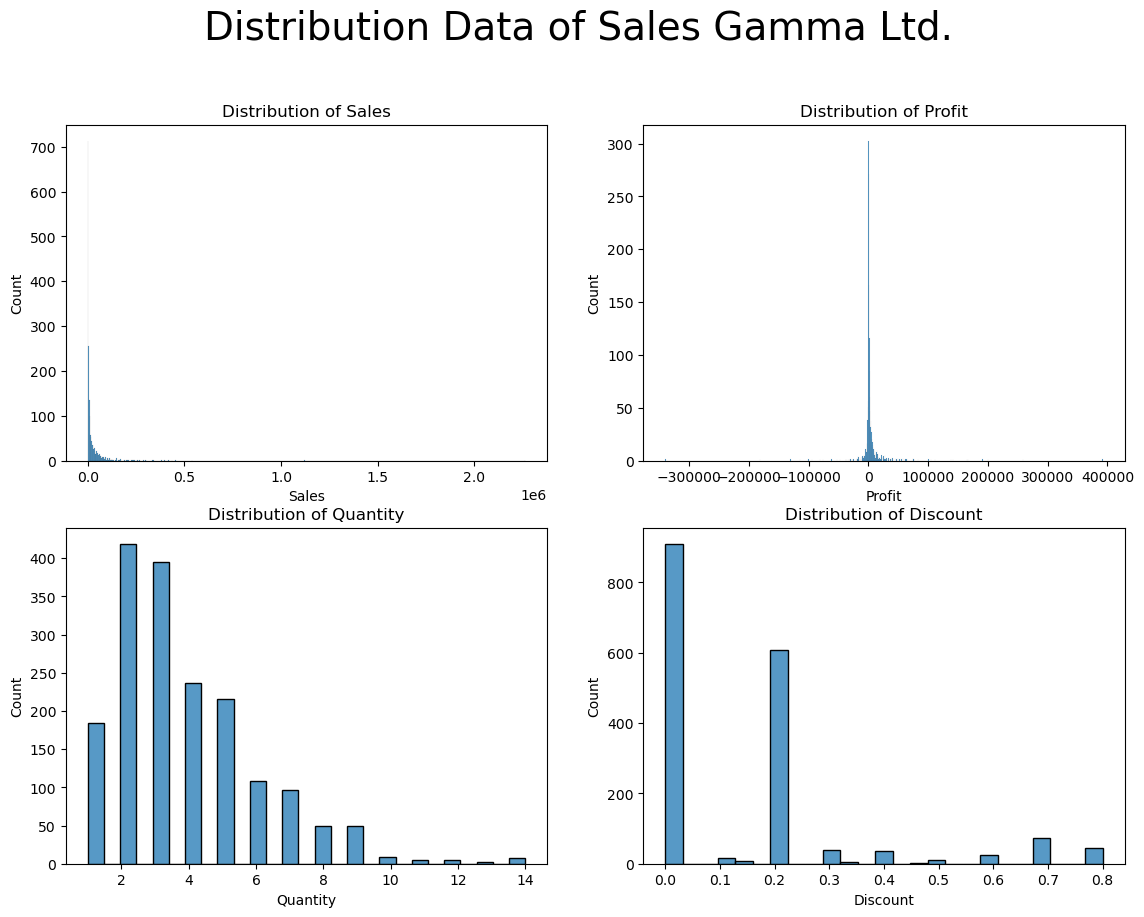

In [35]:
#Let's see distribution of the data
number = ['Sales', 'Profit', 'Quantity', 'Discount']
canvas = 0
n_width = 2
n_rows = 2
plt.figure(figsize=(13.66, 9.6))
for d in range(n_rows):
    for f in range(n_width):
        if canvas == 5:
            break
        else:
            plt.subplot(n_rows, n_width, canvas+1)
            sns.histplot(data=source, x=number[canvas])
            plt.title(f'Distribution of {number[canvas]}')
            canvas+=1
plt.suptitle('Distribution Data of Sales Gamma Ltd.', size=28, y=1.00)
plt.show()

We can see from chart above, our dataset doesn't distribute normally. So, we gonna should use median value as average parameter for our analysis.

In [36]:
#Compute Customer Spending Every Region
customer_spending = source.pivot_table(index='Region', columns='Year', values='Sales', aggfunc='median')
customer_spending.reset_index(inplace=True)
customer_spending = customer_spending[1:]
customer_spending = customer_spending.round(2)

#Create Bar Chart
fig_spending = px.bar(customer_spending, x='Region', y=[c for c in customer_spending.columns if c != 'Region'],
             title='Spending Customer per Year and Region in thousand USD',
             labels={'value': 'Customer Spending', 'variable': 'Year'},
             barmode='group')
fig_spending.show()
display(customer_spending)

Year,Region,2020,2021,2022,2023
1,AMER,5388.0,6084.0,3888.0,5994.0
2,APAC,4002.0,7206.7,4137.0,4266.6
3,EU,6068.8,4798.0,5948.0,6168.0


We have determined the **Customer Spending** from the regions of the Americas, Asia-Pacific, and Europe each year. We will use the **Customer Spending** as a Parameter to further identify the **Customer Spending** from each **Subregion** of every **Region**.

Now, we already have our **Parameters** as based to determine potential location for new **Gamma Branch Office** locations. Further analysis, shall we go to tableau via link below:

https://public.tableau.com/views/Shidqi_JCDS0406011_CapstoneModul2/DistributionofCustomer?:language=en-US&:display_count=n&:origin=viz_share_link

For see deeper our data 

### Asia-Pacific (APAC)

Now shall we look up APAC Region

In [37]:
# Asia-Pacific(APAC) Transaction
apac = source[source['Region'] == 'APAC']
apac.sort_values(by='Order ID', inplace=True)
apac.reset_index(inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_70476\2266645277.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
#Determine Demand per Year of Subregion in Asia-Pacific (APAC)
list_demand_apac = []
for x in apac['Year'].unique():
    for y in apac['Subregion'].unique():
        list_demand_apac.append([x, y, apac[(apac['Year'] == x) & (apac['Subregion'] == y)]['Country'].unique(), apac[(apac['Year'] == x) & (apac['Subregion'] == y)]['Order ID'].nunique(), round(apac[(apac['Year'] == x) & (apac['Subregion'] == y)]['Sales'].median(), 0)])
demand_apac = pd.DataFrame(data = list_demand_apac,
                               columns = ['Year', 'Subregion', 'Country', 'Demand', 'Customer Spending'])
#Showing Parameter
print('Average Demand in Asia-Pacific (APAC) Region')
display(average_demand[average_demand['Region'] == 'APAC'])
print("Average Customer Spending in Asia-Pacific (APAC) Region in USD")
display(customer_spending[customer_spending['Region'] == 'APAC'])

#Create APAC Demand Line Cart
for subregion in demand_apac['Subregion'].unique():
    demand_APACsubregion = demand_apac[demand_apac['Subregion'] == subregion]
    fig_demand_apac = px.line(demand_APACsubregion, x='Year', y='Demand', title=f"Demand per Year for {subregion}")
    fig_demand_apac.update_layout(xaxis=dict(tickmode='linear', tick0=demand_apac['Year'].min(), dtick=1))
    for index, row in demand_APACsubregion.iterrows():
        fig_demand_apac.add_annotation(x=row['Year'], y=row['Demand'], text=f"Customer Spending: ${row['Customer Spending']}",
                       showarrow=True, arrowhead=1)
    fig_demand_apac.show()

Average Demand in Asia-Pacific (APAC) Region


,Region,2020,2021,2022,2023
1,APAC,7,4,4,9


Average Customer Spending in Asia-Pacific (APAC) Region in USD


Year,Region,2020,2021,2022,2023
2,APAC,4002.0,7206.7,4137.0,4266.6


Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Subregions in the Asia Pacific**. All subregions in the Asia Pacific are considered **Potential Subregions** as they meet the predetermined criteria for demand and consumer spending.

In [39]:
anz = apac[apac['Subregion'] == 'ANZ']
list_anz = []
for x in anz['Year'].unique():
    for y in anz['Country'].unique():
        for z in anz['Segment'].unique():
            list_anz.append([x, y, z, anz[(anz['Year'] == x) & (anz['Country'] == y) & (anz['Segment'] == z)]['Sales'].sum(), anz[(anz['Year'] == x) & (anz['Country'] == y) & (anz['Segment'] == z)]['Profit'].sum()])
ausie = pd.DataFrame(data=list_anz,
                     columns=['Year', 'Country', 'Segment', 'Total Sales', 'Profit'])
ausie['Net Profit Margin (%)'] = round(((ausie['Profit']/ausie['Total Sales'])*100), 1)
ausie

,Year,Country,Segment,Total Sales,Profit,Net Profit Margin (%)
0,2020,New Zealand,Enterprise,30237.6,2267.82,7.5
1,2020,Australia,Enterprise,259418.0,-20646.84,-8.0
2,2021,New Zealand,Enterprise,1668.0,566.16,33.9
3,2021,Australia,Enterprise,406397.4,-84160.64,-20.7
4,2022,New Zealand,Enterprise,0.0,0.00,NaN
5,2022,Australia,Enterprise,492816.3,-35478.28,-7.2
6,2023,New Zealand,Enterprise,100836.6,42884.39,42.5
7,2023,Australia,Enterprise,741330.9,-124125.43,-16.7


In [40]:
anz[anz['Country'] == "New Zealand"][['Sales', 'Profit']].corr('spearman')

,Sales,Profit
Sales,1.000000,0.845455
Profit,0.845455,1.000000


### Europe (EU)

Next, shall we look up Europe Region

In [41]:
# Europe(EU) Transaction
eu = source[source['Region'] == 'EU']
eu.sort_values(by='Order ID', inplace=True)
eu.reset_index(inplace=True)
eu.drop('index', axis=1, inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_70476\3439336352.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\semua\AppData\Local\Temp\ipykernel_70476\3439336352.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
#Determine Demand per Year of Subregion in Europe (EU)
list_demand_eu = []
for x in eu['Year'].unique():
    for y in eu['Subregion'].unique():
        list_demand_eu.append([x, y, eu[(eu['Year'] == x) & (eu['Subregion'] == y)]['Order ID'].nunique(), round(eu[(eu['Year'] == x) & (eu['Subregion'] == y)]['Sales'].median(), 0)])
demand_eu = pd.DataFrame(data = list_demand_eu,
                               columns = ['Year', 'Subregion', 'Demand', 'Customer Spending'])
#Showing Parameter
print('Average Demand in Europe (EU) Region')
display(average_demand[average_demand['Region'] == 'EU'])
print("Average Customer Spending in EU (EU) Region in USD")
display(customer_spending[customer_spending['Region'] == 'EU'])

#Create Europe (EU) Demand Line Cart
for subregion in demand_eu['Subregion'].unique():
    demand_EUsubregion = demand_eu[demand_eu['Subregion'] == subregion]
    fig_demand_eu = px.line(demand_EUsubregion, x='Year', y='Demand', title=f'Demand per Year for {subregion}')
    fig_demand_eu.update_layout(xaxis=dict(tickmode='linear', tick0=demand_apac['Year'].min(), dtick=1))
    for index, row in demand_EUsubregion.iterrows():
        fig_demand_eu.add_annotation(x=row['Year'], y=row['Demand'], text=f"Customer Spending: ${(row['Customer Spending'])}",
                       showarrow=True, arrowhead=1)
    fig_demand_eu.show()

Average Demand in Europe (EU) Region


,Region,2020,2021,2022,2023
2,EU,14,16,20,27


Average Customer Spending in EU (EU) Region in USD


Year,Region,2020,2021,2022,2023
3,EU,6068.8,4798.0,5948.0,6168.0


Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Subregions in the Europe**. Northern Europe are **not Potential Subregion** because Northern Europe **doesn't have high demand or high consumer spending** though still have positive growth in demand. **UKIR, EU-West, and EU-East** are considered **Potential Subregions** as they meet the predetermined criteria for demand and consumer spending.

### Americas (AMER)

Last, shall we look up Americas Region

In [43]:
# Americas (AMER) Transaction
amer = source[source['Region'] == 'AMER']
amer.sort_values(by='Order ID', inplace=True)
amer.reset_index(inplace=True)
amer.drop('index', axis=1, inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_70476\84259719.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\semua\AppData\Local\Temp\ipykernel_70476\84259719.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
#Determine Demand per Year of Subregion in Americas (AMER)
list_demand_amer = []
for x in amer['Year'].unique():
    for y in amer['Subregion'].unique():
        list_demand_amer.append([x, y, amer[(amer['Year'] == x) & (amer['Subregion'] == y)]['Order ID'].nunique(), round(amer[(apac['Year'] == x) & (amer['Subregion'] == y)]['Sales'].median(), 0)])
demand_amer = pd.DataFrame(data = list_demand_amer,
                               columns = ['Year', 'Subregion', 'Demand', 'Customer Spending'])
#Showing Parameter
print('Average Demand in Americas (AMER) Region')
display(average_demand[average_demand['Region'] == 'AMER'])
print("Average Customer Spending in Americas (AMER) Region in USD")
display(customer_spending[customer_spending['Region'] == 'AMER'])

#Create AMER Demand Line Cart
for subregion in demand_amer['Subregion'].unique():
    demand_AMERsubregion = demand_amer[demand_amer['Subregion'] == subregion]
    fig_demand_amer = px.line(demand_AMERsubregion, x='Year', y='Demand', title=f'Demand per Year for {subregion}')
    fig_demand_amer.update_layout(xaxis=dict(tickmode='linear', tick0=demand_apac['Year'].min(), dtick=1))
    for index, row in demand_AMERsubregion.iterrows():
        fig_demand_amer.add_annotation(x=row['Year'], y=row['Demand'], text=f"Customer Spending: ${(row['Customer Spending'])}",
                       showarrow=True, arrowhead=1)
    fig_demand_amer.show()

Average Demand in Americas (AMER) Region


,Region,2020,2021,2022,2023
0,AMER,34,34,45,62


Average Customer Spending in Americas (AMER) Region in USD


Year,Region,2020,2021,2022,2023
1,AMER,5388.0,6084.0,3888.0,5994.0


Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Subregions in the Americas**. Just, **North America (NAMER)** are considered **Potential Subregions** as they meet the predetermined criteria for demand and consumer spending.